In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Upload the Yahoo End Rank vs. Draft Sheet 
file_path = r"C:\Users\kenbo\OneDrive\Desktop\Fantasy Hockey Data Project\Yahoo End vs. Draft.xlsx"

# read in the excel file
df = pd.read_excel(file_path)

df.head(10)

,Player Name,Rank,Preseason,All Drafts,Change
0,Connor McDavid,1.0,1.2,1.1,0.1
1,Leon Draisaitl,2.0,2.5,2.4,0.4
2,Auston Matthews,12.0,3.1,3.1,-8.9
3,Nathan MacKinnon,7.0,4.6,4.7,-2.3
4,Cale Makar,73.0,5.5,5.4,-67.6
5,Kirill Kaprizov,47.0,6.8,6.8,-40.2
6,Nikita Kucherov,6.0,8.9,8.6,2.6
7,Mikko Rantanen,9.0,8.7,8.8,-0.2
8,Igor Shesterkin,36.0,9,8.9,-27.1
9,Andrei Vasilevskiy,43.0,8.9,8.9,-34.1


In [17]:

# Convert 'All Drafts' column to numeric type
df['All Drafts'] = pd.to_numeric(df['All Drafts'], errors='coerce')

# Sort the data in ascending order based on 'All Drafts' column
df_sorted = df.sort_values('All Drafts')

# Replace NaN values with "Not Drafted" in 'All Drafts' column
df_sorted['All Drafts'].fillna("Not Drafted", inplace=True)

# Assign bins based on conditions in 'Change' column
df_sorted['Change Bin'] = np.where(df_sorted['Change '] > 0, 'Improved',
                                   np.where((df_sorted['Change '] >= -15) & (df_sorted['Change '] < 0), 'Relatively Similar',
                                            np.where(df_sorted['Change '] < -15, 'Disappointing', 'Not Available')))

df_sorted.head(10)




,Player Name,Rank,Preseason,All Drafts,Change,Change Bin
0,Connor McDavid,1.0,1.2,1.1,0.1,Improved
1,Leon Draisaitl,2.0,2.5,2.4,0.4,Improved
2,Auston Matthews,12.0,3.1,3.1,-8.9,Relatively Similar
3,Nathan MacKinnon,7.0,4.6,4.7,-2.3,Relatively Similar
4,Cale Makar,73.0,5.5,5.4,-67.6,Disappointing
5,Kirill Kaprizov,47.0,6.8,6.8,-40.2,Disappointing
6,Nikita Kucherov,6.0,8.9,8.6,2.6,Improved
7,Mikko Rantanen,9.0,8.7,8.8,-0.2,Relatively Similar
9,Andrei Vasilevskiy,43.0,8.9,8.9,-34.1,Disappointing
8,Igor Shesterkin,36.0,9,8.9,-27.1,Disappointing


In [18]:
# Break up the data into segments of 12 representing each round
rounds = [df_sorted[i:i+12] for i in range(0, len(df_sorted), 12)]

# Calculate percentage of each round labeled as 'Disappointing', 'Relatively Similar', and 'Improved'
round_labels = ['Disappointing', 'Relatively Similar', 'Improved']
round_percentages = []
for rnd in rounds:
    counts = rnd['Change Bin'].value_counts()
    percentages = counts / counts.sum() * 100
    round_percentages.append([percentages.get(label, 0) for label in round_labels])

# Create a table of the percentages for each round
table_data = pd.DataFrame(round_percentages, columns=round_labels)
table_data.index = range(1, len(rounds)+1)
table_data.index.name = 'Round'

# Display the table
print(table_data)


       Disappointing  Relatively Similar   Improved
Round                                              
1          41.666667           33.333333  25.000000
2          58.333333           16.666667  25.000000
3          58.333333            8.333333  33.333333
4          58.333333            8.333333  33.333333
5          58.333333            8.333333  33.333333
6          16.666667            8.333333  75.000000
7          16.666667           16.666667  66.666667
8          16.666667            8.333333  75.000000
9          33.333333            8.333333  58.333333
10          8.333333            8.333333  83.333333
11         16.666667            8.333333  75.000000
12          8.333333            0.000000  91.666667
13          8.333333            0.000000  91.666667
14          0.000000            0.000000  25.000000
15          0.000000            0.000000   0.000000
16          0.000000            0.000000   0.000000
17          0.000000            0.000000   0.000000


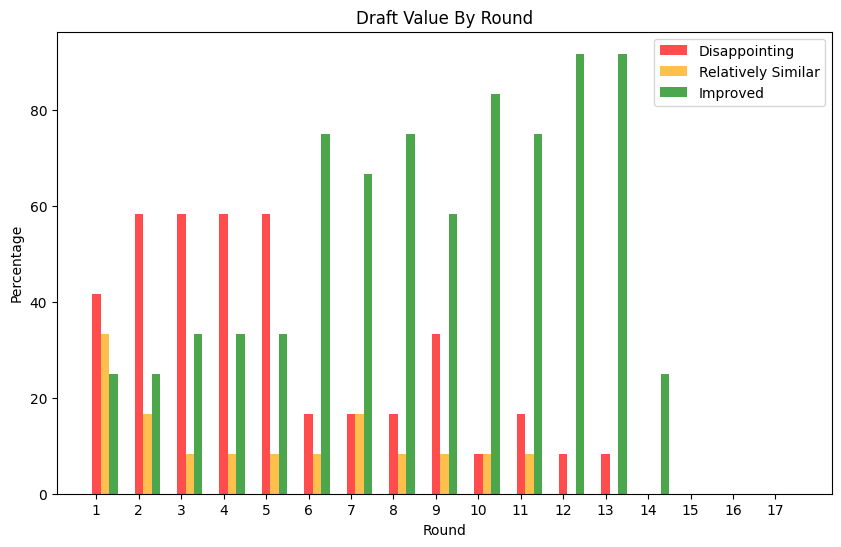

In [19]:
# Prepare data for the side-by-side bar graph
round_numbers = range(1, len(rounds)+1)
bar_width = 0.2
colors = ['red', 'orange', 'green']

# Plotting the side-by-side bar graph
plt.figure(figsize=(10, 6))
for i, label in enumerate(round_labels):
    percentages = [percentage[i] for percentage in round_percentages]
    bar_positions = [x + (i * bar_width) for x in round_numbers]
    plt.bar(bar_positions, percentages, width=bar_width, label=label, color=colors[i], alpha=0.7)

plt.xlabel('Round')
plt.ylabel('Percentage')
plt.title('Draft Value By Round')
plt.xticks(round_numbers)
plt.legend()
plt.show()

## This exercise shows us that there are more draft 'Busts' in the first 5 rounds than previously expected. Perhaps this signals that the key to good roster construction via the draft is in finding value beyond the 5th round. 